In [47]:
from numpy import *
from matplotlib.pyplot import *
import matplotlib.animation

In [48]:
n = 100     # size of grid: n * n
Dh = 1. / n # spatial resolution, assuming space is [0,1] * [0,1]
Dt = 0.02   # temporal resolution

a, b, c, d, h, k = 1., -1., 2., -1.5, 1., 1. # parameter values

Du = 0.0001 # diffusion constant of u
Dv = 0.0006 # diffusion constant of v

def initialize():
    global u, v, nextu, nextv
    u = zeros([n, n])
    v = zeros([n, n])
    for x in range(n):
        for y in range(n):
            u[x, y] = 1. + random.uniform(-0.03, 0.03) # small noise is added
            v[x, y] = 1. + random.uniform(-0.03, 0.03) # small noise is added
    nextu = zeros([n, n])
    nextv = zeros([n, n])
    
def observe():
    global u, v, nextu, nextv
    subplot(1, 2, 1)
    cla()
    imshow(u, vmin = 0, vmax = 2)
    title('u')
    subplot(1, 2, 2)
    cla()
    imshow(v, vmin = 0, vmax = 2)
    title('v')
    
def update():
    global u, v, nextu, nextv
    for x in range(n):
        for y in range(n):
            # state-transition function
            uC, uR, uL, uU, uD = u[x,y], u[(x+1)%n,y], u[(x-1)%n,y], \
                                 u[x,(y+1)%n], u[x,(y-1)%n]
            vC, vR, vL, vU, vD = v[x,y], v[(x+1)%n,y], v[(x-1)%n,y], \
                                 v[x,(y+1)%n], v[x,(y-1)%n]
            uLap = (uR + uL + uU + uD - 4 * uC) / (Dh**2)
            vLap = (vR + vL + vU + vD - 4 * vC) / (Dh**2)
            nextu[x,y] = uC + (a*(uC-h) + b*(vC-k) + Du * uLap) * Dt
            nextv[x,y] = vC + (c*(uC-h) + d*(vC-k) + Dv * vLap) * Dt

    u, nextu = nextu, u
    v, nextv = nextv, v


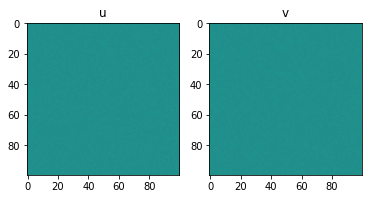

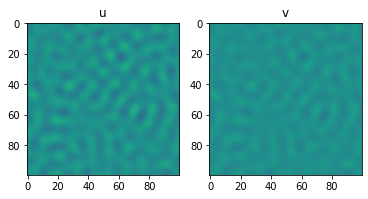

In [49]:
%matplotlib inline
initialize()

observe()
show()

for i in range(1500):
    update()
    observe()

In [50]:
width = 50
height = 50
initProb = 0.5

Ra = 1
Ri = 5
Wa = 1
Wi = 0.1



In [51]:
def initialize():
    global time, config, nextConfig

    time = 0
    
    config = zeros([height, width])
    for x in range(width):
        for y in range(height):
            if random.random() < initProb:
                state = 1
            else:
                state = 0
            config[y, x] = state

    nextConfig = zeros([height, width])



In [52]:
def observe():
    cla()
    im=ax.imshow(config, vmin = 0, vmax = 1, cmap = 'binary')
    #axis('image')
    title('t = ' + str(time))
    return im



In [53]:
def update():
    global time, config, nextConfig

    time += 1

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            na = ni = 0
            for dx in range(- Ra, Ra + 1):
                for dy in range(- Ra, Ra + 1):
                    na += config[(y+dy)%height, (x+dx)%width]
            for dx in range(- Ri, Ri + 1):
                for dy in range(- Ri, Ri + 1):
                    ni += config[(y+dy)%height, (x+dx)%width]
            if na * Wa - ni * Wi > 0:
                state = 1
            else:
                state = 0
            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config


<IPython.core.display.Javascript object>


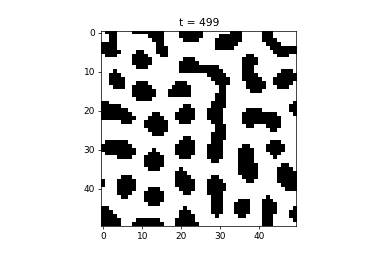

In [54]:
%matplotlib notebook

initialize()
ims=[]
fig,ax=subplots()
for i in range(500):
    im=ax.imshow(config, vmin = 0, vmax = 1, cmap = 'binary')
    #axis('image')
    title('t = ' + str(time))
    ims.append([im])
    update()

ani = matplotlib.animation.ArtistAnimation(fig, ims, interval=50, blit=True,repeat_delay=1000)

<IPython.core.display.Javascript object>


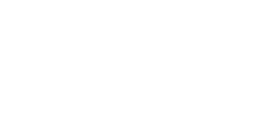

AttributeError: 'NoneType' object has no attribute 'remove_callback'